<a href="https://colab.research.google.com/github/franrilo/Test-Notebooks/blob/main/ITX_stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [305]:
raw_data_unfiltered = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ITX Stock/ITX stocks.csv', index_col='Date', parse_dates=True)

raw_data = raw_data_unfiltered.dropna(axis=0, how='any')

raw_data.isna().sum()

raw_data.head(10)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-05-25,3.600,3.676,3.580,3.602,-0.137946,50448300.0
2001-05-28,3.560,3.604,3.544,3.580,-0.137103,26118945.0
2001-05-29,3.562,3.626,3.562,3.614,-0.138405,26910070.0
2001-05-30,3.606,3.648,3.602,3.620,-0.138635,48229995.0
2001-05-31,3.620,3.676,3.610,3.670,-0.140550,24806710.0
2001-06-01,3.664,3.696,3.640,3.660,-0.140167,20779305.0
2001-06-04,3.642,3.804,3.642,3.800,-0.145529,35163235.0
2001-06-05,3.802,3.866,3.774,3.822,-0.146371,35137060.0
2001-06-06,3.846,3.870,3.784,3.830,-0.146678,19954860.0


In [254]:
raw_data.count()

Open         5069
High         5069
Low          5069
Close        5069
Adj Close    5069
Volume       5069
dtype: int64

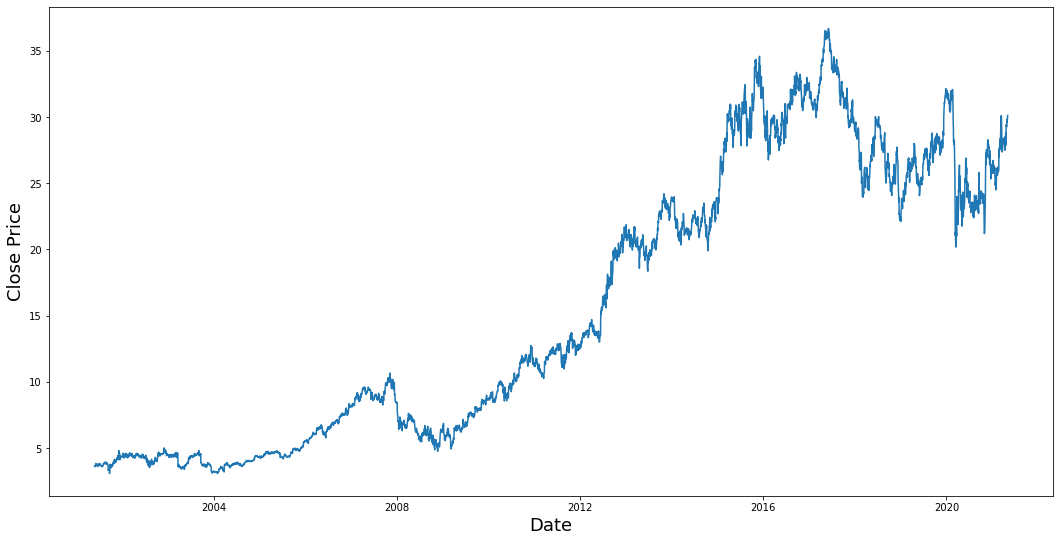

In [255]:
plt.figure(figsize = (18,9))
plt.plot(raw_data['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.show()

In [306]:
train_size = 80

train_split = (raw_data.shape[0]*train_size)// 100


X_train_data = raw_data.iloc[:train_split,3:4].values
X_test_data = raw_data.iloc[train_split:,3:4].values

print("X train shape:" + str(X_train_data.shape) + "\n")
print("X test shape:" + str(X_test_data.shape) + "\n")

X train shape:(4055, 1)

X test shape:(1014, 1)



In [257]:
sc = MinMaxScaler(feature_range=(0,1))
X_train_scaled = sc.fit_transform(X_train_data)
X_test_scaled = sc.fit_transform(X_test_data)

In [258]:
X_train = []
y_train = []

X_test = []
y_test = []

window_size = 60

for i in range (window_size,X_train_scaled.shape[0]):
  X_train.append(X_train_scaled[i-window_size:i,0])
  y_train.append(X_train_scaled[i,0])

X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

print("X train shape:" + str(X_train.shape) + "\n")
print("y train shape:" + str(y_train.shape) + "\n")


for i in range (window_size,X_test_scaled.shape[0]):
  X_test.append(X_test_scaled[i-window_size:i,0])
  y_test.append(X_test_scaled[i,0])

X_test, y_test = np.array(X_test) , np.array(y_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

print("X test shape:" + str(X_test.shape) + "\n")
print("y test shape:" + str(y_test.shape) + "\n")


X train shape:(3995, 60, 1)

y train shape:(3995,)

X test shape:(954, 60, 1)

y test shape:(954,)



In [261]:
model = Sequential()

model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))


model.add(Dense(units=1, activation='sigmoid'))


model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train,y_train, epochs = 10, batch_size=64)

Epoch 1/10
63/63 [==============================] - 15s 143ms/step - loss: 0.0470
Epoch 2/10
63/63 [==============================] - 9s 148ms/step - loss: 0.0021
Epoch 3/10
63/63 [==============================] - 9s 147ms/step - loss: 0.0011
Epoch 4/10
63/63 [==============================] - 9s 146ms/step - loss: 8.7856e-04
Epoch 5/10
63/63 [==============================] - 9s 144ms/step - loss: 0.0010
Epoch 6/10
63/63 [==============================] - 9s 148ms/step - loss: 8.4455e-04
Epoch 7/10
63/63 [==============================] - 9s 148ms/step - loss: 8.8789e-04
Epoch 8/10
63/63 [==============================] - 9s 150ms/step - loss: 8.7116e-04
Epoch 9/10
63/63 [==============================] - 9s 147ms/step - loss: 7.7251e-04
Epoch 10/10
63/63 [==============================] - 9s 148ms/step - loss: 7.2590e-04


In [303]:
predictions_untransformed = model.predict(X_test)
predictions = sc.inverse_transform(predictions_untransformed)
print(predictions.shape)

(954, 1)


In [296]:
Dates = raw_data.iloc[train_split+window_size:,]
print(Dates.Close)

Date
2017-08-08    34.355000
2017-08-09    34.040001
2017-08-10    33.595001
2017-08-11    33.169998
2017-08-14    33.430000
                ...    
2021-04-28    29.809999
2021-04-29    29.820000
2021-04-30    29.620001
2021-05-03    30.000000
2021-05-04    30.110001
Name: Close, Length: 954, dtype: float64


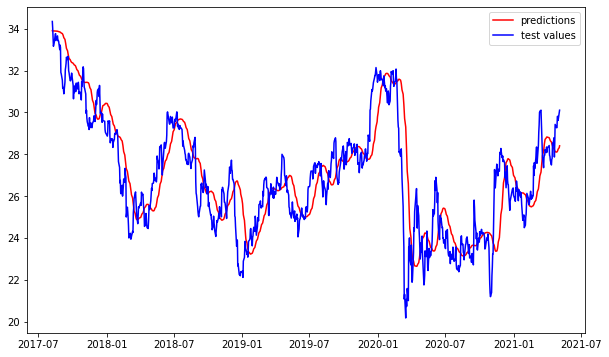

In [297]:
plt.figure(figsize=(10,6))
plt.plot(Dates.index.values, predictions, color='red', label='predictions')
plt.plot(Dates.index.values, Dates.Close, color='blue', label='test values')
plt.legend()

In [302]:
prediction_mean_squared_error = mean_squared_error(Dates.Close, predictions)
prediction_mean_absolut_error = mean_absolute_error(Dates.Close, predictions)
print("Prediction Mean Squared Error: " + str(prediction_mean_squared_error))
print("Prediction Mean Absolut Error: "  + str(prediction_mean_absolut_error))

Prediction Mean Squared Error: 2.3722996034523525
Prediction Mean Absolut Error: 1.1051660359668531
